In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving CVD Dataset.csv to CVD Dataset.csv
User uploaded file "CVD Dataset.csv" with length 167325 bytes


In [3]:
df=pd.read_csv("CVD Dataset.csv")

In [4]:
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [6]:
df.shape


(1529, 22)

In [7]:
df.describe()


,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1451.000000,1448.000000,1462.000000,1465.000000,1462.000000,1456.000000,1449.000000,1462.000000,1455.000000,1450.000000,1458.000000,1447.000000,1460.000000,1459.000000
mean,47.025500,85.917427,1.754111,28.465997,91.773214,198.539148,56.197378,117.485636,175.390600,0.525727,125.627572,82.917761,111.550685,16.960925
std,12.421063,21.012580,0.113090,7.038685,12.823573,57.794099,16.066754,30.289174,11.251527,0.081213,22.112099,14.731277,58.866220,2.436192
min,25.000000,50.100000,1.502000,15.000000,70.000000,100.000000,30.000000,70.000000,150.000000,0.360000,90.000000,60.000000,-18.000000,10.530000
25%,37.000000,67.050000,1.660000,22.629000,80.500000,150.000000,42.000000,92.000000,166.000000,0.460000,107.000000,71.000000,61.000000,15.205000
50%,46.000000,86.614500,1.755000,28.159000,91.600000,197.000000,56.000000,115.000000,175.694000,0.522000,125.000000,82.000000,109.000000,16.880000
75%,55.000000,105.000000,1.845500,34.000000,102.269000,249.000000,70.000000,138.000000,184.208500,0.583750,141.000000,93.000000,159.000000,18.630000
max,79.000000,120.000000,2.000000,46.200000,119.996000,300.000000,89.000000,198.000000,199.960000,0.787000,179.000000,119.000000,237.000000,24.170000


In [8]:
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score'],
      dtype='object')

In [9]:
print(df.columns.tolist())


['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level', 'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score']


In [10]:
obj_col = [x for x in df.columns if df[x].dtype=='object']
obj_col

['Sex',
 'Blood Pressure (mmHg)',
 'Smoking Status',
 'Diabetes Status',
 'Physical Activity Level',
 'Family History of CVD',
 'CVD Risk Level',
 'Blood Pressure Category']

In [11]:
num_col = [x for x in df.columns if df[x].dtype!='object']
num_col

['Age',
 'Weight (kg)',
 'Height (m)',
 'BMI',
 'Abdominal Circumference (cm)',
 'Total Cholesterol (mg/dL)',
 'HDL (mg/dL)',
 'Fasting Blood Sugar (mg/dL)',
 'Height (cm)',
 'Waist-to-Height Ratio',
 'Systolic BP',
 'Diastolic BP',
 'Estimated LDL (mg/dL)',
 'CVD Risk Score']

In [12]:
df.isnull().sum()

,0
Sex,0
Age,78
Weight (kg),81
Height (m),67
BMI,64
Abdominal Circumference (cm),67
Blood Pressure (mmHg),0
Total Cholesterol (mg/dL),73
HDL (mg/dL),80
Fasting Blood Sugar (mg/dL),67


In [13]:
df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)

,0
Diastolic BP,82
Weight (kg),81
HDL (mg/dL),80
Waist-to-Height Ratio,79
Age,78
Height (cm),74
Total Cholesterol (mg/dL),73
Systolic BP,71
CVD Risk Score,70
Estimated LDL (mg/dL),69


In [14]:
df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)/len(df) * 100

,0
Diastolic BP,5.362982
Weight (kg),5.297580
HDL (mg/dL),5.232178
Waist-to-Height Ratio,5.166776
Age,5.101373
Height (cm),4.839765
Total Cholesterol (mg/dL),4.774362
Systolic BP,4.643558
CVD Risk Score,4.578156
Estimated LDL (mg/dL),4.512753


In [15]:
df.isnull().sum().sum()

np.int64(1022)

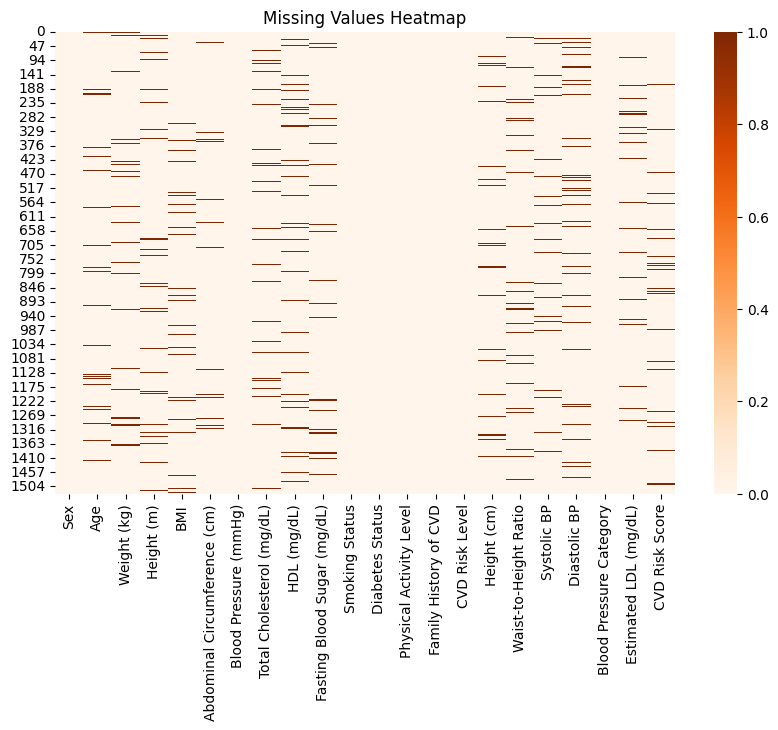

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap="Oranges")
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
print("Blood Pressure columns available in dataset:")
print(df[['Systolic BP', 'Diastolic BP']].head())

Blood Pressure columns available in dataset:
   Systolic BP  Diastolic BP
0        125.0          79.0
1        139.0          70.0
2        104.0          77.0
3        140.0          83.0
4        144.0          83.0


In [18]:
df['Height (cm)'] = df['Height (cm)'].fillna(df['Height (cm)'].median())
df['Height (m)'] = df['Height (m)'].fillna(df['Height (m)'].median())
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].median())
df.head()


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1000,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7000,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,86.6145,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3000,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,175.694,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5000,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [19]:
df['Total Cholesterol (mg/dL)'] = df['Total Cholesterol (mg/dL)'].fillna(
    df['Total Cholesterol (mg/dL)'].median()
)

df['HDL (mg/dL)'] = df['HDL (mg/dL)'].fillna(
    df['HDL (mg/dL)'].median()
)

df['Estimated LDL (mg/dL)'] = df['Estimated LDL (mg/dL)'].fillna(
    df['Estimated LDL (mg/dL)'].median()
)
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1000,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7000,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,86.6145,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3000,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,175.694,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5000,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [20]:
df.groupby('Diabetes Status')['Fasting Blood Sugar (mg/dL)'].median()

,Fasting Blood Sugar (mg/dL)
Diabetes Status,
N,114.0
Y,117.0


In [21]:
df['Fasting Blood Sugar (mg/dL)'] = df['Fasting Blood Sugar (mg/dL)'].fillna(
    df.groupby('Diabetes Status')['Fasting Blood Sugar (mg/dL)']
    .transform('median')
)
df.head()


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1000,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7000,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,86.6145,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3000,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,175.694,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5000,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [22]:
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
df['BMI'] = df['BMI'].round(1)
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1000,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7000,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,86.6145,1.83,25.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3000,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,175.694,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5000,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [23]:
df['Waist-to-Height Ratio'] = df['Waist-to-Height Ratio'].fillna(df['Abdominal Circumference (cm)'] / df['Height (cm)'])

In [24]:
df[df['Waist-to-Height Ratio'].isnull()][['Waist-to-Height Ratio','Abdominal Circumference (cm)','Height (cm)']]

,Waist-to-Height Ratio,Abdominal Circumference (cm),Height (cm)
244,NaN,NaN,181.0
480,NaN,NaN,160.0


In [25]:
threshold = 20
df['Heart_Disease'] = (df['CVD Risk Score'] >= threshold).astype(int)

df['Heart_Disease'].value_counts()


,count
Heart_Disease,
0,1360
1,169


In [26]:
df.drop(columns=['CVD Risk Score'], inplace=True)


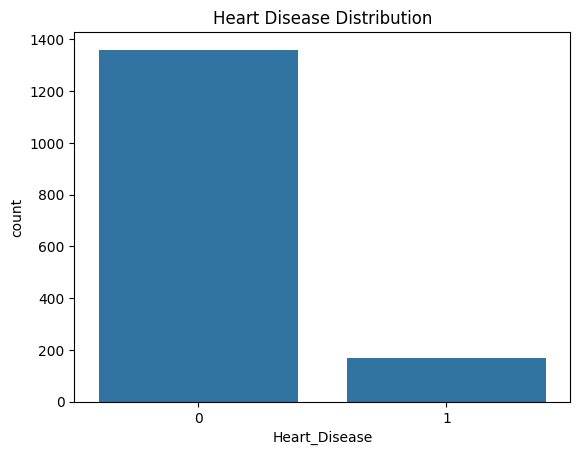

In [27]:
sns.countplot(x='Heart_Disease', data=df)
plt.title("Heart Disease Distribution")
plt.show()


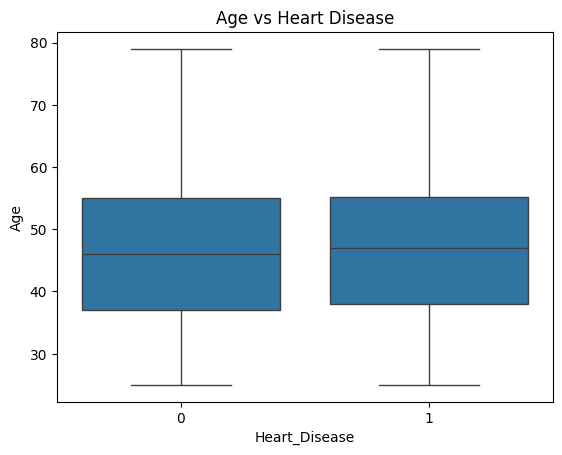

In [28]:
sns.boxplot(x='Heart_Disease', y='Age', data=df)
plt.title("Age vs Heart Disease")
plt.show()


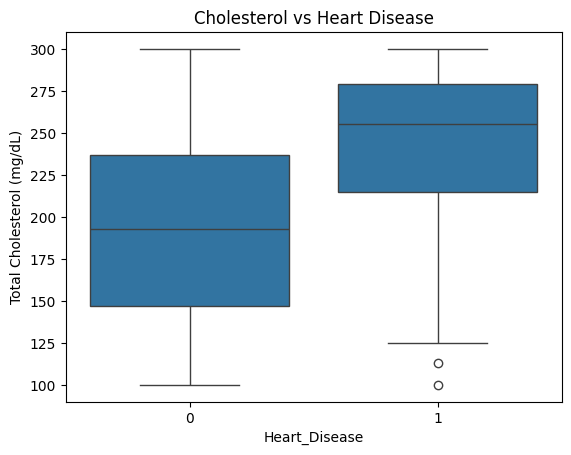

In [29]:
sns.boxplot(x='Heart_Disease', y='Total Cholesterol (mg/dL)', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()


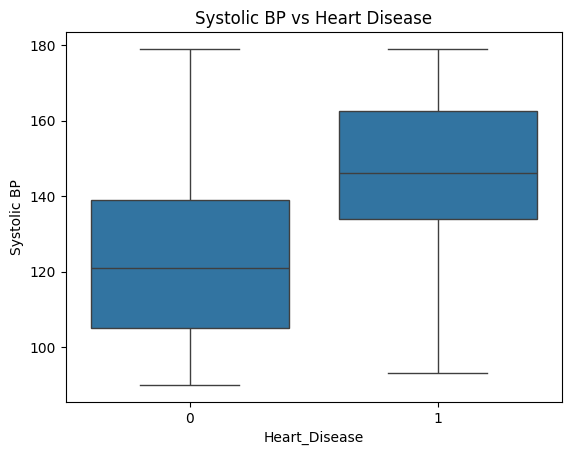

In [30]:
sns.boxplot(x='Heart_Disease', y='Systolic BP', data=df)
plt.title("Systolic BP vs Heart Disease")
plt.show()


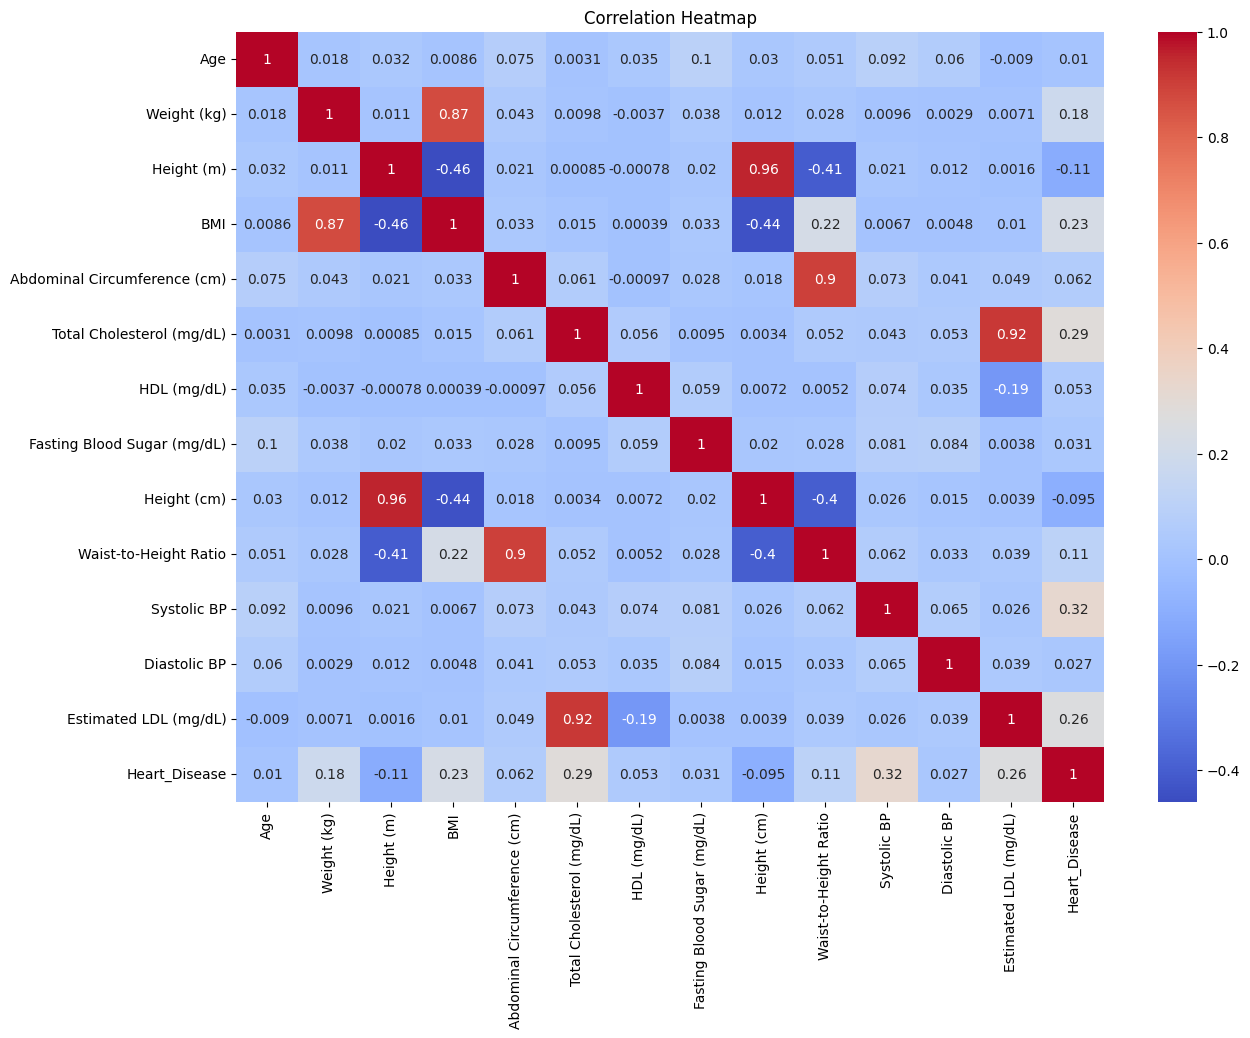

In [31]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [32]:
# 🔹 FINAL SAFETY CHECK FOR MISSING VALUES (CRITICAL)

# Numerical columns → median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify no missing values remain
print("Remaining missing values per column:")
print(df.isnull().sum())


Remaining missing values per column:
Sex                             0
Age                             0
Weight (kg)                     0
Height (m)                      0
BMI                             0
Abdominal Circumference (cm)    0
Blood Pressure (mmHg)           0
Total Cholesterol (mg/dL)       0
HDL (mg/dL)                     0
Fasting Blood Sugar (mg/dL)     0
Smoking Status                  0
Diabetes Status                 0
Physical Activity Level         0
Family History of CVD           0
CVD Risk Level                  0
Height (cm)                     0
Waist-to-Height Ratio           0
Systolic BP                     0
Diastolic BP                    0
Blood Pressure Category         0
Estimated LDL (mg/dL)           0
Heart_Disease                   0
dtype: int64


In [33]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [34]:
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [36]:
class_labels = ["Low Risk", "Medium Risk", "High Risk"]


In [37]:
import pandas as pd
import numpy as np


In [38]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
])


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)


In [40]:
rf_weighted = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)


In [41]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(
        kernel='rbf',
        probability=True,
        random_state=42
    ))
])


In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

grid = GridSearchCV(
    svm_pipeline,
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_svm = grid.best_estimator_

print("Best SVM Parameters:", grid.best_params_)


Best SVM Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [44]:
models = {
    "Logistic Regression (SMOTE)": lr_pipeline,
    "Random Forest": rf,
    "Random Forest (Class Weighted)": rf_weighted,
    "SVM (SMOTE + GridSearch)": best_svm,
    "XGBoost": xgb
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Logistic Regression (SMOTE) trained successfully.
Random Forest trained successfully.
Random Forest (Class Weighted) trained successfully.
SVM (SMOTE + GridSearch) trained successfully.
XGBoost trained successfully.


In [49]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

class_labels = ["No Heart Disease", "Heart Disease"]

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
    else:
        roc = None

    acc = accuracy_score(y_test, y_pred)

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("ROC-AUC:", roc if roc is not None else "Not available")

    print(classification_report(
        y_test,
        y_pred,
        target_names=class_labels
    ))

    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": roc
    })



Logistic Regression (SMOTE)
Accuracy: 0.9052287581699346
ROC-AUC: 0.9554498269896194
                  precision    recall  f1-score   support

No Heart Disease       0.98      0.91      0.94       272
   Heart Disease       0.55      0.85      0.67        34

        accuracy                           0.91       306
       macro avg       0.76      0.88      0.81       306
    weighted avg       0.93      0.91      0.91       306


Random Forest
Accuracy: 0.934640522875817
ROC-AUC: 0.9569096020761245
                  precision    recall  f1-score   support

No Heart Disease       0.94      0.99      0.96       272
   Heart Disease       0.85      0.50      0.63        34

        accuracy                           0.93       306
       macro avg       0.90      0.74      0.80       306
    weighted avg       0.93      0.93      0.93       306


Random Forest (Class Weighted)
Accuracy: 0.934640522875817
ROC-AUC: 0.9605860726643599
                  precision    recall  f1-score   sup

In [47]:
y.value_counts()


,count
Heart_Disease,
0,1360
1,169


In [50]:
report = classification_report(
    y_test,
    models["SVM (SMOTE + GridSearch)"].predict(X_test),
    target_names=class_labels,
    output_dict=True
)

classwise_df = pd.DataFrame(report).transpose()
classwise_df


,precision,recall,f1-score,support
No Heart Disease,0.983806,0.893382,0.936416,272.000000
Heart Disease,0.508475,0.882353,0.645161,34.000000
accuracy,0.892157,0.892157,0.892157,0.892157
macro avg,0.746140,0.887868,0.790789,306.000000
weighted avg,0.930991,0.892157,0.904055,306.000000


In [51]:
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
results_df


,Model,Accuracy,ROC-AUC
2,Random Forest (Class Weighted),0.934641,0.960586
1,Random Forest,0.934641,0.956910
0,Logistic Regression (SMOTE),0.905229,0.955450
3,SVM (SMOTE + GridSearch),0.892157,0.954801
4,XGBoost,0.931373,0.953720


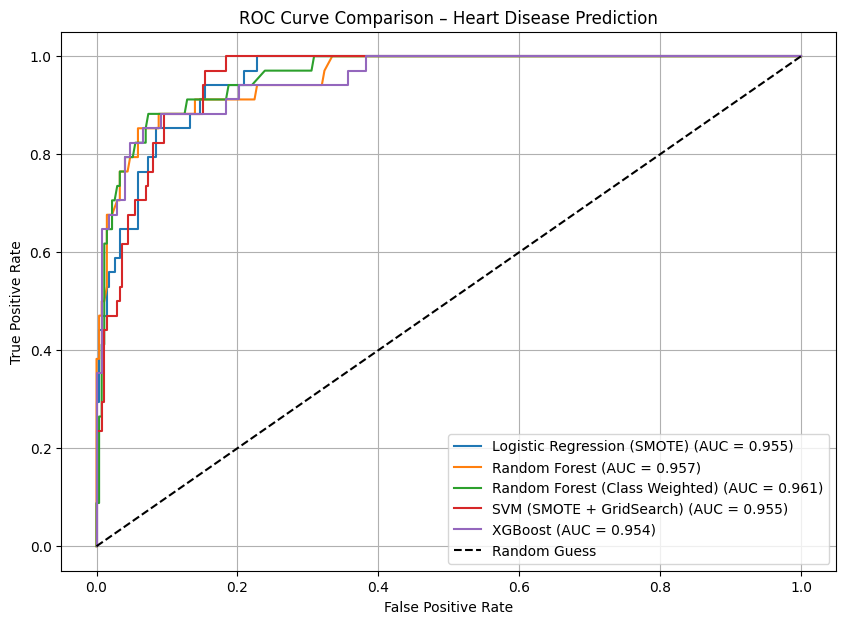

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # prob of Heart Disease
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Heart Disease Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [54]:
import joblib

joblib.dump(best_svm, "final_heart_disease_model.pkl")

print("Final optimized SVM model saved successfully.")


Final optimized SVM model saved successfully.


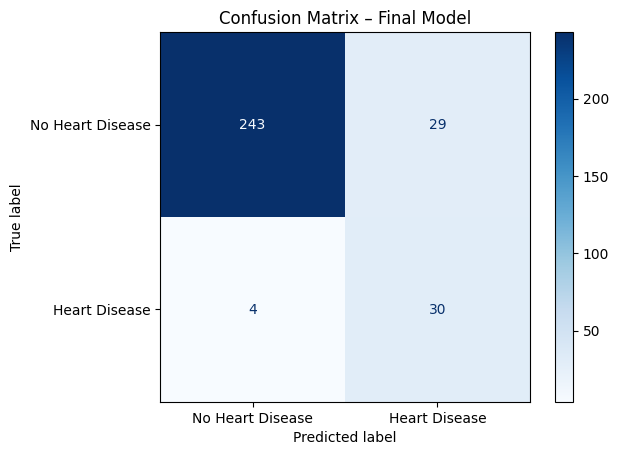

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    best_svm,
    X_test,
    y_test,
    display_labels=["No Heart Disease", "Heart Disease"],
    cmap="Blues"
)

plt.title("Confusion Matrix – Final Model")
plt.show()


In [56]:
import joblib

model = joblib.load("final_heart_disease_model.pkl")
print("Model loaded successfully")


Model loaded successfully


In [57]:
X.columns


Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)'],
      dtype='object')

In [60]:
import pandas as pd

# Create empty input with correct columns
new_patient = pd.DataFrame(columns=model.feature_names_in_)


In [64]:
import pandas as pd

complex_test_data = pd.DataFrame([
    {
        "Sex": 1, "Age": 62, "Weight (kg)": 85, "Height (m)": 1.68,
        "BMI": 30.1, "Abdominal Circumference (cm)": 102,
        "Blood Pressure (mmHg)": 150, "Total Cholesterol (mg/dL)": 245,
        "HDL (mg/dL)": 38, "Fasting Blood Sugar (mg/dL)": 160,
        "Smoking Status": 1, "Diabetes Status": 1,
        "Physical Activity Level": 0, "Family History of CVD": 1,
        "CVD Risk Level": 2, "Height (cm)": 168,
        "Waist-to-Height Ratio": 0.61,
        "Systolic BP": 150, "Diastolic BP": 95,
        "Blood Pressure Category": 3,
        "Estimated LDL (mg/dL)": 165
    },
    {
        "Sex": 0, "Age": 45, "Weight (kg)": 62, "Height (m)": 1.65,
        "BMI": 22.8, "Abdominal Circumference (cm)": 78,
        "Blood Pressure (mmHg)": 118, "Total Cholesterol (mg/dL)": 180,
        "HDL (mg/dL)": 55, "Fasting Blood Sugar (mg/dL)": 90,
        "Smoking Status": 0, "Diabetes Status": 0,
        "Physical Activity Level": 2, "Family History of CVD": 0,
        "CVD Risk Level": 0, "Height (cm)": 165,
        "Waist-to-Height Ratio": 0.47,
        "Systolic BP": 118, "Diastolic BP": 75,
        "Blood Pressure Category": 1,
        "Estimated LDL (mg/dL)": 110
    },
    {
        # Borderline / ambiguous case
        "Sex": 1, "Age": 52, "Weight (kg)": 74, "Height (m)": 1.72,
        "BMI": 25.0, "Abdominal Circumference (cm)": 90,
        "Blood Pressure (mmHg)": 132, "Total Cholesterol (mg/dL)": 205,
        "HDL (mg/dL)": 45, "Fasting Blood Sugar (mg/dL)": 110,
        "Smoking Status": 1, "Diabetes Status": 0,
        "Physical Activity Level": 1, "Family History of CVD": 1,
        "CVD Risk Level": 1, "Height (cm)": 172,
        "Waist-to-Height Ratio": 0.52,
        "Systolic BP": 132, "Diastolic BP": 85,
        "Blood Pressure Category": 2,
        "Estimated LDL (mg/dL)": 140
    }
])


In [65]:
predictions = model.predict(complex_test_data)
probabilities = model.predict_proba(complex_test_data)[:, 1]

results = complex_test_data.copy()
results["Prediction"] = predictions
results["Heart Disease Probability"] = probabilities

results


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),Prediction,Heart Disease Probability
0,1,62,85,1.68,30.1,102,150,245,38,160,...,1,2,168,0.61,150,95,3,165,1,0.980696
1,0,45,62,1.65,22.8,78,118,180,55,90,...,0,0,165,0.47,118,75,1,110,0,0.000044
2,1,52,74,1.72,25.0,90,132,205,45,110,...,1,1,172,0.52,132,85,2,140,0,0.006159


In [74]:
import pandas as pd

unseen_data = pd.DataFrame([
    {
        # Case 1 – Moderate risk, middle-aged
        "Sex": 1,
        "Age": 49,
        "Weight (kg)": 76,
        "Height (m)": 1.70,
        "BMI": 26.3,
        "Abdominal Circumference (cm)": 92,
        "Blood Pressure (mmHg)": 128,
        "Total Cholesterol (mg/dL)": 210,
        "HDL (mg/dL)": 46,
        "Fasting Blood Sugar (mg/dL)": 108,
        "Smoking Status": 1,
        "Diabetes Status": 0,
        "Physical Activity Level": 1,
        "Family History of CVD": 1,
        "CVD Risk Level": 1,
        "Height (cm)": 170,
        "Waist-to-Height Ratio": 0.54,
        "Systolic BP": 128,
        "Diastolic BP": 82,
        "Blood Pressure Category": 2,
        "Estimated LDL (mg/dL)": 145
    },
    {
        # Case 2 – Very low risk, healthy lifestyle
        "Sex": 0,
        "Age": 34,
        "Weight (kg)": 58,
        "Height (m)": 1.62,
        "BMI": 22.1,
        "Abdominal Circumference (cm)": 74,
        "Blood Pressure (mmHg)": 112,
        "Total Cholesterol (mg/dL)": 170,
        "HDL (mg/dL)": 62,
        "Fasting Blood Sugar (mg/dL)": 88,
        "Smoking Status": 0,
        "Diabetes Status": 0,
        "Physical Activity Level": 2,
        "Family History of CVD": 0,
        "CVD Risk Level": 0,
        "Height (cm)": 162,
        "Waist-to-Height Ratio": 0.46,
        "Systolic BP": 112,
        "Diastolic BP": 72,
        "Blood Pressure Category": 1,
        "Estimated LDL (mg/dL)": 98
    },
    {
        # Case 3 – High risk, multiple factors
        "Sex": 1,
        "Age": 61,
        "Weight (kg)": 89,
        "Height (m)": 1.68,
        "BMI": 31.5,
        "Abdominal Circumference (cm)": 108,
        "Blood Pressure (mmHg)": 155,
        "Total Cholesterol (mg/dL)": 255,
        "HDL (mg/dL)": 36,
        "Fasting Blood Sugar (mg/dL)": 165,
        "Smoking Status": 1,
        "Diabetes Status": 1,
        "Physical Activity Level": 0,
        "Family History of CVD": 1,
        "CVD Risk Level": 2,
        "Height (cm)": 168,
        "Waist-to-Height Ratio": 0.64,
        "Systolic BP": 155,
        "Diastolic BP": 96,
        "Blood Pressure Category": 3,
        "Estimated LDL (mg/dL)": 178
    },
    {
        # Case 4 – Borderline / ambiguous
        "Sex": 0,
        "Age": 52,
        "Weight (kg)": 70,
        "Height (m)": 1.65,
        "BMI": 25.7,
        "Abdominal Circumference (cm)": 88,
        "Blood Pressure (mmHg)": 132,
        "Total Cholesterol (mg/dL)": 198,
        "HDL (mg/dL)": 48,
        "Fasting Blood Sugar (mg/dL)": 115,
        "Smoking Status": 0,
        "Diabetes Status": 0,
        "Physical Activity Level": 1,
        "Family History of CVD": 1,
        "CVD Risk Level": 1,
        "Height (cm)": 165,
        "Waist-to-Height Ratio": 0.53,
        "Systolic BP": 132,
        "Diastolic BP": 85,
        "Blood Pressure Category": 2,
        "Estimated LDL (mg/dL)": 135
    }
])


In [75]:
preds = model.predict(unseen_data)
probs = model.predict_proba(unseen_data)[:, 1]

unseen_results = unseen_data.copy()
unseen_results["Prediction"] = preds
unseen_results["Heart Disease Probability"] = probs

unseen_results


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),Prediction,Heart Disease Probability
0,1,49,76,1.70,26.3,92,128,210,46,108,...,1,1,170,0.54,128,82,2,145,0,0.006528
1,0,34,58,1.62,22.1,74,112,170,62,88,...,0,0,162,0.46,112,72,1,98,0,0.000011
2,1,61,89,1.68,31.5,108,155,255,36,165,...,1,2,168,0.64,155,96,3,178,1,0.994299
3,0,52,70,1.65,25.7,88,132,198,48,115,...,1,1,165,0.53,132,85,2,135,0,0.001641


In [76]:
def risk_category(p):
    if p < 0.33:
        return "Low Risk"
    elif p < 0.66:
        return "Medium Risk"
    else:
        return "High Risk"

unseen_results["Risk Category"] = unseen_results["Heart Disease Probability"].apply(risk_category)
unseen_results


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),Prediction,Heart Disease Probability,Risk Category
0,1,49,76,1.70,26.3,92,128,210,46,108,...,1,170,0.54,128,82,2,145,0,0.006528,Low Risk
1,0,34,58,1.62,22.1,74,112,170,62,88,...,0,162,0.46,112,72,1,98,0,0.000011,Low Risk
2,1,61,89,1.68,31.5,108,155,255,36,165,...,2,168,0.64,155,96,3,178,1,0.994299,High Risk
3,0,52,70,1.65,25.7,88,132,198,48,115,...,1,165,0.53,132,85,2,135,0,0.001641,Low Risk


In [73]:
from sklearn.metrics import roc_auc_score

train_prob = model.predict_proba(X_train)[:, 1]
test_prob = model.predict_proba(X_test)[:, 1]

print("Train ROC-AUC:", roc_auc_score(y_train, train_prob))
print("Test  ROC-AUC:", roc_auc_score(y_test, test_prob))


Train ROC-AUC: 0.9553717320261439
Test  ROC-AUC: 0.9548010380622838


In [71]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    model,
    X,
    y,
    scoring='roc_auc',
    cv=5
)

print("CV ROC-AUC mean:", cv_scores.mean())
print("CV ROC-AUC std :", cv_scores.std())


CV ROC-AUC mean: 0.9406240169864738
CV ROC-AUC std : 0.03561424681266309


In [72]:
decision_scores = model.decision_function(very_complex_high_risk_data)
decision_scores


array([7.12051893, 6.16307457, 4.35897555])

In [77]:
import pandas as pd

controlled_unseen_data = pd.DataFrame([
    {
        # 🔴 Case 1 – High Risk (Severe)
        "Sex": 1,
        "Age": 68,
        "Weight (kg)": 95,
        "Height (m)": 1.68,
        "BMI": 33.7,
        "Abdominal Circumference (cm)": 112,
        "Blood Pressure (mmHg)": 165,
        "Total Cholesterol (mg/dL)": 280,
        "HDL (mg/dL)": 34,
        "Fasting Blood Sugar (mg/dL)": 170,
        "Smoking Status": 1,
        "Diabetes Status": 1,
        "Physical Activity Level": 0,
        "Family History of CVD": 1,
        "CVD Risk Level": 2,
        "Height (cm)": 168,
        "Waist-to-Height Ratio": 0.67,
        "Systolic BP": 165,
        "Diastolic BP": 100,
        "Blood Pressure Category": 3,
        "Estimated LDL (mg/dL)": 185
    },
    {
        # 🔴 Case 2 – High Risk (Multiple factors)
        "Sex": 0,
        "Age": 60,
        "Weight (kg)": 88,
        "Height (m)": 1.62,
        "BMI": 33.5,
        "Abdominal Circumference (cm)": 108,
        "Blood Pressure (mmHg)": 158,
        "Total Cholesterol (mg/dL)": 265,
        "HDL (mg/dL)": 36,
        "Fasting Blood Sugar (mg/dL)": 155,
        "Smoking Status": 0,
        "Diabetes Status": 1,
        "Physical Activity Level": 0,
        "Family History of CVD": 1,
        "CVD Risk Level": 2,
        "Height (cm)": 162,
        "Waist-to-Height Ratio": 0.67,
        "Systolic BP": 158,
        "Diastolic BP": 96,
        "Blood Pressure Category": 3,
        "Estimated LDL (mg/dL)": 172
    },
    {
        # 🟠 Case 3 – Medium Risk (Borderline)
        "Sex": 1,
        "Age": 50,
        "Weight (kg)": 78,
        "Height (m)": 1.72,
        "BMI": 26.4,
        "Abdominal Circumference (cm)": 94,
        "Blood Pressure (mmHg)": 138,
        "Total Cholesterol (mg/dL)": 215,
        "HDL (mg/dL)": 44,
        "Fasting Blood Sugar (mg/dL)": 118,
        "Smoking Status": 1,
        "Diabetes Status": 0,
        "Physical Activity Level": 1,
        "Family History of CVD": 1,
        "CVD Risk Level": 1,
        "Height (cm)": 172,
        "Waist-to-Height Ratio": 0.55,
        "Systolic BP": 138,
        "Diastolic BP": 88,
        "Blood Pressure Category": 2,
        "Estimated LDL (mg/dL)": 148
    },
    {
        # 🟢 Case 4 – Low Risk (Healthy)
        "Sex": 0,
        "Age": 32,
        "Weight (kg)": 56,
        "Height (m)": 1.64,
        "BMI": 20.8,
        "Abdominal Circumference (cm)": 72,
        "Blood Pressure (mmHg)": 110,
        "Total Cholesterol (mg/dL)": 165,
        "HDL (mg/dL)": 60,
        "Fasting Blood Sugar (mg/dL)": 85,
        "Smoking Status": 0,
        "Diabetes Status": 0,
        "Physical Activity Level": 2,
        "Family History of CVD": 0,
        "CVD Risk Level": 0,
        "Height (cm)": 164,
        "Waist-to-Height Ratio": 0.44,
        "Systolic BP": 110,
        "Diastolic BP": 70,
        "Blood Pressure Category": 1,
        "Estimated LDL (mg/dL)": 95
    }
])


In [78]:
preds = model.predict(controlled_unseen_data)
probs = model.predict_proba(controlled_unseen_data)[:, 1]

final_results = controlled_unseen_data.copy()
final_results["Prediction"] = preds
final_results["Heart Disease Probability"] = probs

final_results


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),Prediction,Heart Disease Probability
0,1,68,95,1.68,33.7,112,165,280,34,170,...,1,2,168,0.67,165,100,3,185,1,0.999999
1,0,60,88,1.62,33.5,108,158,265,36,155,...,1,2,162,0.67,158,96,3,172,1,0.995882
2,1,50,78,1.72,26.4,94,138,215,44,118,...,1,1,172,0.55,138,88,2,148,0,0.025855
3,0,32,56,1.64,20.8,72,110,165,60,85,...,0,0,164,0.44,110,70,1,95,0,0.000006


In [83]:
def risk_category(p):
    if p < 0.15:
        return "Low Risk"
    elif p < 0.75:
        return "Medium Risk"
    else:
        return "High Risk"

final_results["Risk Category"] = final_results["Heart Disease Probability"].apply(risk_category)
final_results

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),Prediction,Heart Disease Probability,Risk Category,Decision Score
0,1,68,95,1.68,33.7,112,165,280,34,170,...,168,0.67,165,100,3,185,1,0.999999,High Risk,5.181423
1,0,60,88,1.62,33.5,108,158,265,36,155,...,162,0.67,158,96,3,172,1,0.995882,High Risk,3.732896
2,1,50,78,1.72,26.4,94,138,215,44,118,...,172,0.55,138,88,2,148,0,0.025855,Low Risk,-2.368157
3,0,32,56,1.64,20.8,72,110,165,60,85,...,164,0.44,110,70,1,95,0,0.000006,Low Risk,-7.980513
